# Load in Boston housing data set and train NGBoost model

In [1]:
import sys
sys.path.append("../..")

In [2]:
from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = load_boston(True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test.flatten()).mean()
print('Test NLL', test_NLL)

[iter 0] loss=3.6483 val_loss=0.0000 scale=0.5000 norm=3.3928
[iter 100] loss=3.0937 val_loss=0.0000 scale=1.0000 norm=3.8307
[iter 200] loss=2.4551 val_loss=0.0000 scale=2.0000 norm=4.0511
[iter 300] loss=2.0437 val_loss=0.0000 scale=2.0000 norm=3.2047
[iter 400] loss=1.8457 val_loss=0.0000 scale=1.0000 norm=1.4397
Test MSE 6.215584751882489
Test NLL 2.590569145665296


# Feature importance for each parameter

## Feature importance for loc trees

In [3]:
ngb.feature_importances_[0]

array([0.07335516, 0.00416493, 0.02800235, 0.01143102, 0.05700804,
       0.21998733, 0.09810716, 0.13090997, 0.02697387, 0.06331768,
       0.06698812, 0.05752631, 0.16222807])

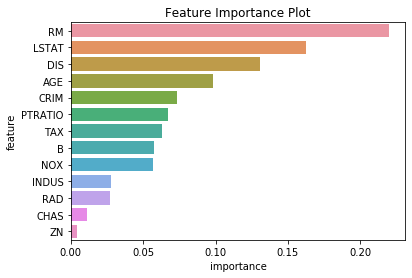

In [4]:
# Feature importance plot
feature_importance = pd.DataFrame({'feature':load_boston()['feature_names'], 
                                   'importance':ngb.feature_importances_[0]})\
    .sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance)

## Feature importance for scale trees

In [5]:
ngb.feature_importances_[1]

array([0.03499668, 0.03179946, 0.0421987 , 0.00305463, 0.06738745,
       0.23038586, 0.06233942, 0.09566871, 0.0359057 , 0.09357494,
       0.04821882, 0.08096553, 0.17350409])

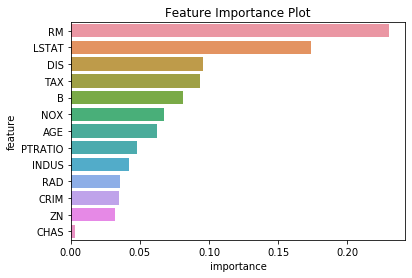

In [6]:
# Feature importance plot
feature_importance = pd.DataFrame({'feature':load_boston()['feature_names'], 
                                   'importance':ngb.feature_importances_[1]})\
    .sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance)